In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
%matplotlib inline

Text(0, 0.5, 'Viagra')

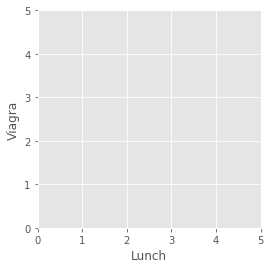

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 5)
ax.set_xlabel('Lunch')
ax.set_ylim(0, 5)
ax.set_ylabel('Viagra')


In [4]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_m

In [5]:
documents = [
    """From: Martha Washington <marthafirst@hotmail.com>
Subject: Lunch
Date: January 25, 1794 9:30:58 AM EST
To: George Washington <president@whitehouse.gov>

Looking forward to lunch at noon today. I reserved my MealPal at Nerds and Nibblers. Please don't forget to book yours. You know how much I hate standing in line.

 xoxo Martha 😻
""",
    """From: Aaron Burr <aabear@aol.com>
Subject: Quality meds, low price, quick delivery!
Date: January 25, 1794 9:35:21 AM EST
To: George Washington <president@whitehouse.gov>

Not dead yet? We have the Viagra that you need!!!

GUARANTEED BEST PRICE VIAGRA! WE HAVE QUICKSILVER TOO!!!

CLICK HERE FOR VIAGRA! ORDER NOW!
http://legit-pharmacy.ru/viagra-deals?ref=aabear

""",
    
]

In [6]:
len(documents)

2

In [7]:
vocab = ['lunch', 'viagra']

In [39]:
#How can we turn these strings into counts of lunch and viagra?
doc1 = documents[0]

In [40]:
from string import punctuation
from collections import Counter

In [41]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
def replace_punctuation_with_spaces(text):
    """Return text with all punctuation turned into spaces."""
    output = ''
    for char in text:
        if char in punctuation:
            char = ' '
        output += char
    return output

In [50]:
replace_punctuation_with_spaces(doc)

'From  Martha Washington  marthafirst hotmail com \nSubject  Lunch\nDate  January 25  1794 9 30 58 AM EST\nTo  George Washington  president whitehouse gov \n\nLooking forward to lunch at noon today  I reserved my MealPal at Nerds and Nibblers  Please don t forget to book yours  You know how much I hate standing in line \n\n xoxo Martha 😻\n'

In [64]:
[replace_punctuation_with_spaces(doc) for doc in documents]

#BEST PRACTICE:
#create your function so that it does something once (instead of taking in the whole list)
#because it's super easy to apply it to a whole list later via list comprehension

['From  Martha Washington  marthafirst hotmail com \nSubject  Lunch\nDate  January 25  1794 9 30 58 AM EST\nTo  George Washington  president whitehouse gov \n\nLooking forward to lunch at noon today  I reserved my MealPal at Nerds and Nibblers  Please don t forget to book yours  You know how much I hate standing in line \n\n xoxo Martha 😻\n',
 'From  Aaron Burr  aabear aol com \nSubject  Quality meds  low price  quick delivery \nDate  January 25  1794 9 35 21 AM EST\nTo  George Washington  president whitehouse gov \n\nNot dead yet  We have the Viagra that you need   \n\nGUARANTEED BEST PRICE VIAGRA  WE HAVE QUICKSILVER TOO   \n\nCLICK HERE FOR VIAGRA  ORDER NOW \nhttp   legit pharmacy ru viagra deals ref aabear\n\n']

In [60]:
def tokenize(doc,vocab=vocab):
    """Return a list of words from strings"""
    text = replace_punctuation_with_spaces(doc.lower())
    words = [word for word in text.split() if word in vocab] #
    return words

In [61]:
corpus = [tokenize(doc) for doc in documents] #collection of documents
corpus

[['lunch', 'lunch'], ['viagra', 'viagra', 'viagra', 'viagra']]

In [62]:
def vectorize(corpus): #turn into dataframe of word counts
    return pd.DataFrame([Counter(doc) for doc in corpus])

In [63]:
vectorize(corpus)

,lunch,viagra
0,2.0,NaN
1,NaN,4.0


In [65]:
#GET THE BOOK: "WRITING IDIOMATIC PYTHON" for writing the simplest/best versions > just writing it to get the thing done


In [81]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
sklearn.__version__ #version 0 is still the leading version

'0.20.2'

In [75]:
cv = CountVectorizer() #calling vocabulary=vocab in Count Vectorizer 
                #specifying which words you're looking for in the next 2 functions

In [76]:
cv.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [77]:
cv.transform(documents)

<2x82 sparse matrix of type '<class 'numpy.int64'>'
	with 98 stored elements in Compressed Sparse Row format>

In [87]:
data = cv.transform(documents).toarray() #each column has a word associated with it
data

array([[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
        2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 3, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 4, 1, 2, 1, 0, 1, 1, 0]])

In [88]:
cols = [x[0] for x in sorted(cv.vocabulary_.items(), key=lambda x:x[0])] #count vectorizer indexes alphabetically
cols

['1794',
 '21',
 '25',
 '30',
 '35',
 '58',
 'aabear',
 'aaron',
 'am',
 'and',
 'aol',
 'at',
 'best',
 'book',
 'burr',
 'click',
 'com',
 'date',
 'dead',
 'deals',
 'delivery',
 'don',
 'est',
 'for',
 'forget',
 'forward',
 'from',
 'george',
 'gov',
 'guaranteed',
 'hate',
 'have',
 'here',
 'hotmail',
 'how',
 'http',
 'in',
 'january',
 'know',
 'legit',
 'line',
 'looking',
 'low',
 'lunch',
 'martha',
 'marthafirst',
 'mealpal',
 'meds',
 'much',
 'my',
 'need',
 'nerds',
 'nibblers',
 'noon',
 'not',
 'now',
 'order',
 'pharmacy',
 'please',
 'president',
 'price',
 'quality',
 'quick',
 'quicksilver',
 'ref',
 'reserved',
 'ru',
 'standing',
 'subject',
 'that',
 'the',
 'to',
 'today',
 'too',
 'viagra',
 'washington',
 'we',
 'whitehouse',
 'xoxo',
 'yet',
 'you',
 'yours']

In [89]:
pd.DataFrame(data, columns=cols)

,1794,21,25,30,35,58,aabear,aaron,am,and,...,today,too,viagra,washington,we,whitehouse,xoxo,yet,you,yours
0,1,0,1,1,0,1,0,0,1,1,...,1,0,0,2,0,1,1,0,1,1
1,1,1,1,0,1,0,2,1,1,0,...,0,1,4,1,2,1,0,1,1,0
